<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  PCA para estudiar la dimensionalidad de la calidad de vida en las ciudades 

En este caso-taller vamos a aplicar PCA en el estudio de calidad de vida en diferentes ciudades. Para ello, haremos uso de los datos que surgen del Almanaque Calificado de Lugares. En este Almanaque Boyer y Savageau calificaron 329 ciudades de acuerdo con los siguientes nueve criterios:

   - Clima y Terreno
   - Alojamiento
   - Cuidado de la salud y el medio ambiente
   - Crimen
   - Transporte
   - Educación
   - Artes
   - Recreación
   - Economía 


Con tantas variables disponibles, la matriz de dispersión puede resultar muy grande para estudiarla e interpretarla adecuadamente. Habría demasiadas correlaciones por pares entre las variables para considerar. Para interpretar los datos de una forma más significativa es necesario reducir el número de variables a unas pocas dimensiones, y para ello en este ejercicio recurriremos al análisis de componentes principales. 
 

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo junto al archivo de soporte.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en la misma ruta de acceso del cuaderno, por ejemplo: `data/archivo_de_soporte.csv`.

## Desarrollo


### 1. Carga de datos

En la carpeta `data` se encuentra el archivo `lugares.csv` cargue estos datos en su *cuaderno*.

In [2]:
import pandas as pd
places_rated_almanac= pd.read_csv('data/lugares.csv', index_col='Ciudad')
places_rated_almanac.head()



,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633
"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727


### Descripción
El primer paso es importar la libreria de pandas para el analisis de datos. Especificamente, se emplea el metodo read_csv con la ruta donde se encuentra localizado el repositorio para leer el archivo. Adicionalmente, se lee indicandole que Ciudad es el indice del Dataframe. 


### 2.  Análisis descriptivo de las variables. 

Para el análisis descriptivo haga uso de correlogramas, histogramas y estadísticas descriptivas. Indique además cuantas gráficas de dispersión bivariadas debería examinar con este número de variables. Tenga en cuenta que para las variables, a excepción de la alojamiento y crimen, cuanto mayor sea el puntaje, mejor. Por el contrario; para alojamiento y crimen, mientras más bajo sea el puntaje, mejor. También, mientras algunas comunidades podrían calificar mejor en las artes, otras podrían calificar mejor en otras áreas como tener una tasa de criminalidad más baja y buenas oportunidades educativas.

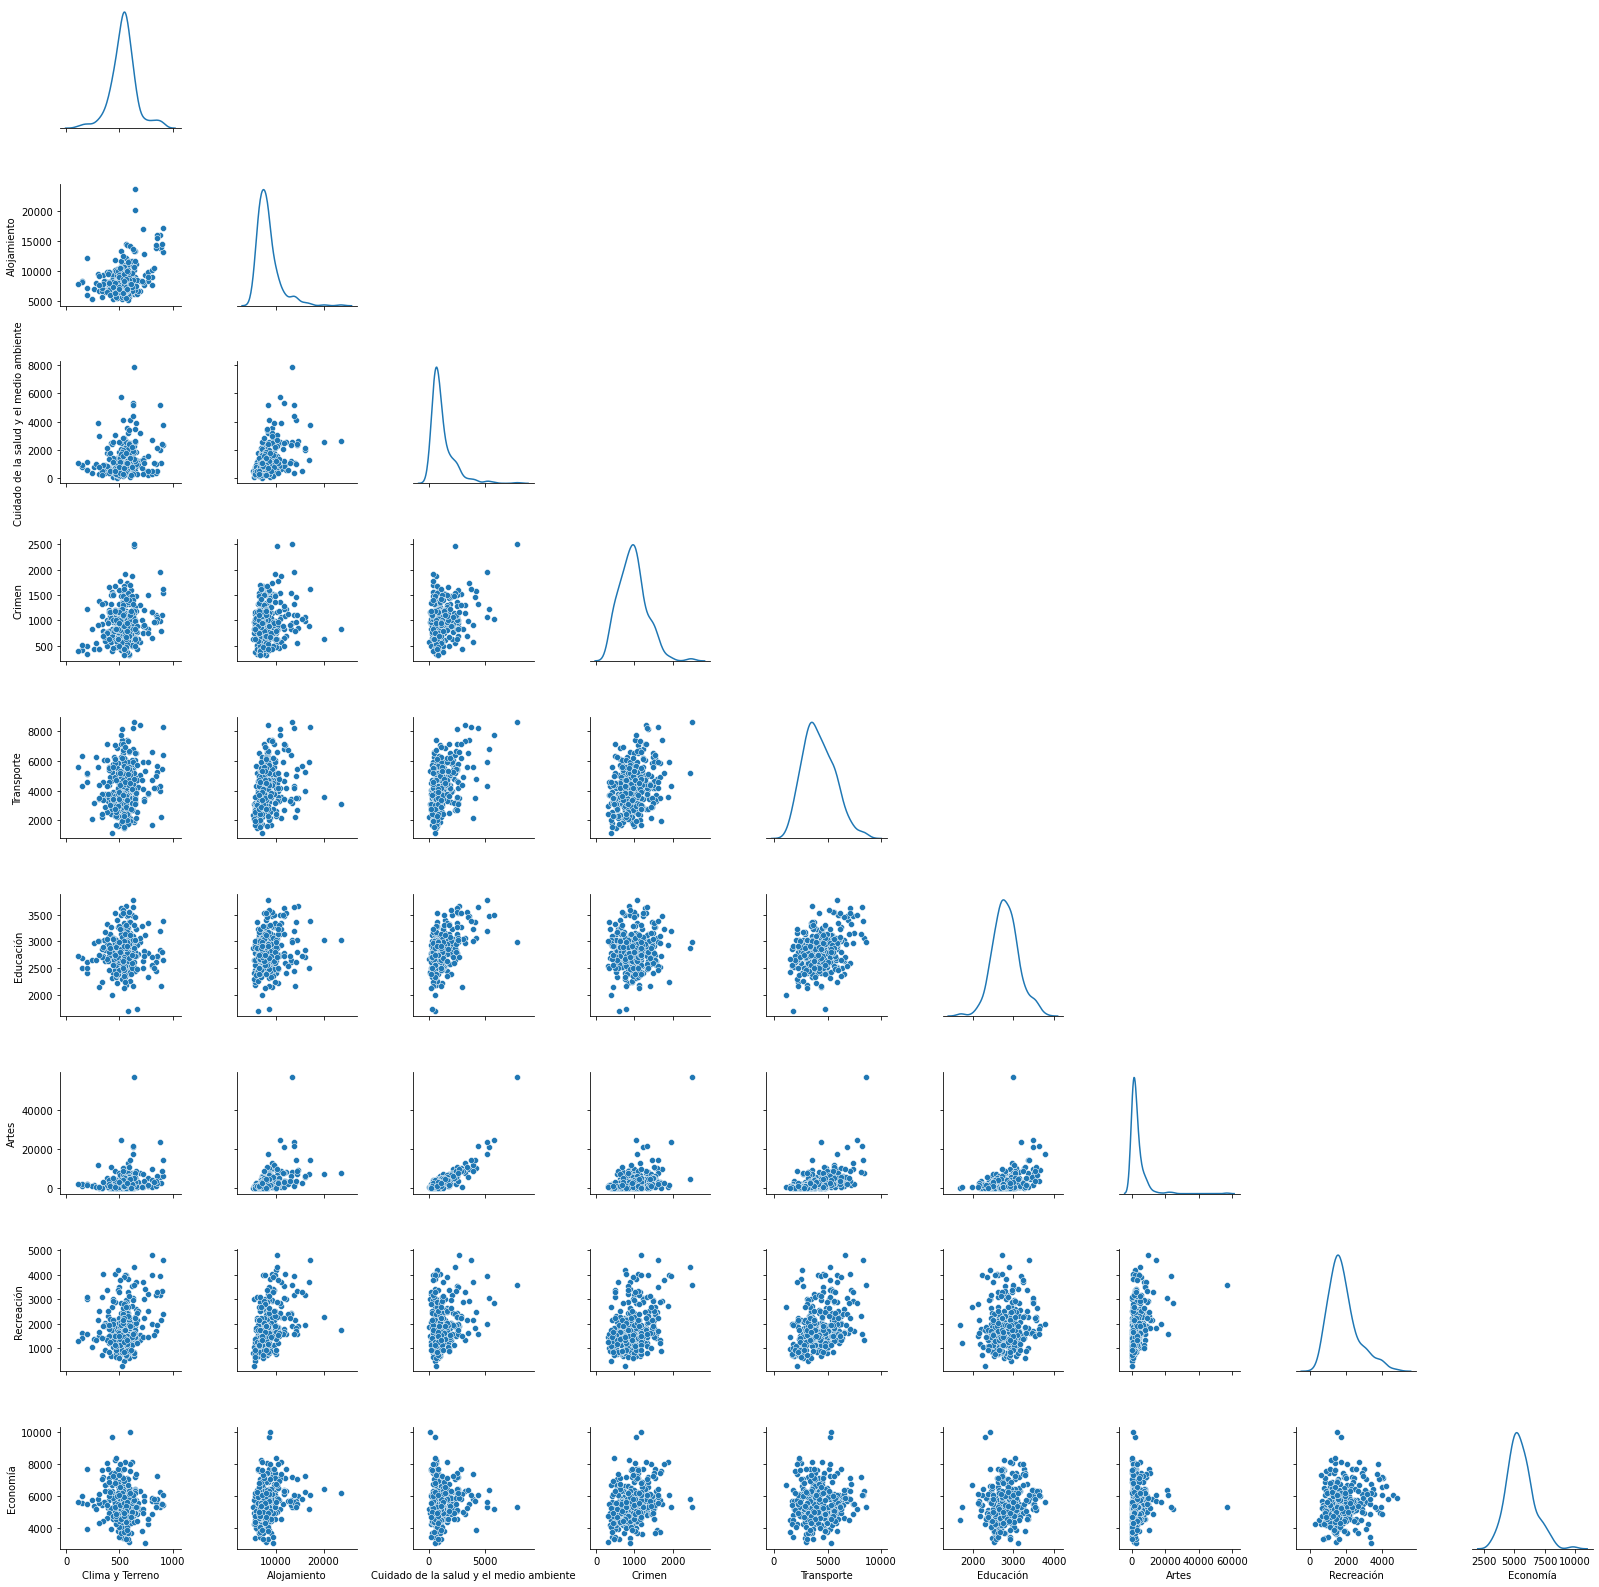

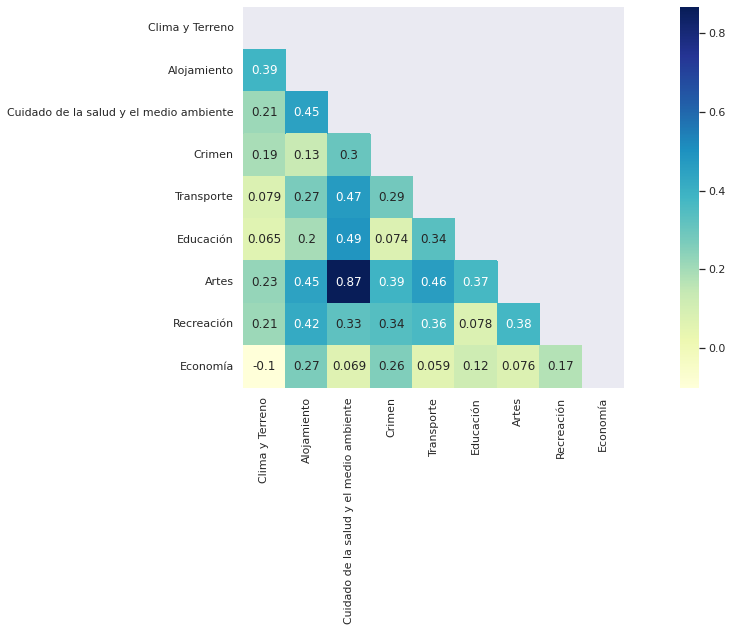

,count,mean,std,min,25%,50%,75%,max
Clima y Terreno,329.0,538.732523,120.808259,105.0,480.0,542.0,592.0,910.0
Alojamiento,329.0,8346.559271,2385.262622,5159.0,6760.0,7877.0,9015.0,23640.0
Cuidado de la salud y el medio ambiente,329.0,1185.738602,1003.002036,43.0,583.0,833.0,1445.0,7850.0
Crimen,329.0,961.054711,357.154186,308.0,707.0,947.0,1156.0,2498.0
Transporte,329.0,4210.082067,1451.179240,1145.0,3141.0,4080.0,5205.0,8625.0
Educación,329.0,2814.887538,320.792953,1701.0,2619.0,2794.0,3012.0,3781.0
Artes,329.0,3150.884498,4642.283738,52.0,778.0,1871.0,3844.0,56745.0
Recreación,329.0,1845.957447,807.888171,300.0,1316.0,1670.0,2176.0,4800.0
Economía,329.0,5525.364742,1084.468523,3045.0,4842.0,5384.0,6113.0,9980.0


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Relacion por pares
g = sns.PairGrid(places_rated_almanac, diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)
plt.show()

# Matriz de Correlacion
sns.set(font_scale=1)
plt.figure(figsize = (20,7))
mask = np.triu(np.ones_like(places_rated_almanac.corr()))
dataplot = sns.heatmap(places_rated_almanac.corr(), cmap="YlGnBu", annot=True,square = True,mask= mask)
plt.show()

#
places_rated_almanac.describe().T

### Descripción
- Se necesitarian 36 graficas de dispersion bivariada.
$\left(\left(\begin{array}{c}
9\\
2
\end{array}\right)=\frac{9\times8}{2}=36\right)$
- En el diagrama de relacion por pares se puede observar algunas relaciones ,como la que existe entre (Artes, Cuidado  Salud y Medio Ambiente),(Educacion, Cuidado  Salud y Medio Ambiente) , (Transporte , Medio Ambiente), (Artes, Transporte). Respecto ,  alas distribuciones visualizadas en la diagonal,  Artes tiene una distribucion marcada skewed a la derecha con una media de 3150.88 y una desviacion standart de 4642.2837.

- Por otro lado, en la matriz de correlacion se puede observar  una presencia alta de correlacion positiva entre (Artes, Medio Ambiente) y una corelaciones moderadas entre (Educacion, Cuidado  Salud y Medio Ambiente) , (Transporte , Medio Ambiente), (Artes, Transporte). Esto confirma lo analizado en el diagrama de relaciones por pares.

Finalmente, en las estadisticas descriptivas, las variables tienen una escala de magnitud diferente entre ellas  en donde la mayor desviacion estandar se ve reflejada en Artes y Alojamiento seguido por Transporte, y como se demostrara mas adelante, esta tendran mayor "contribucion" en los componentes principales.



### 3.  Cálculo y selección de componentes principales.

Utilizando Álgebra Lineal, calcule los eigen valores y los eigen vectores. Explique la conexión  entre los eigen valores, los eigen vectores, y los componentes principales. Examine los valores propios para determinar cuántos componentes principales se deben considerar. Explique el criterio que utilizó para la elección y justifique su respuesta.

 VALORES PROPIOS ['24413668.72', '4408004.85', '1638039.60', '1076355.78', '478338.27', '10962.63', '92809.94', '66995.90', '240851.80']

EIGEN VECTOR 1: [0.006416 0.269142 0.178319 0.028134 0.149302 0.025191 0.930860 0.069824
 0.025131]

EIGEN VECTOR 2: [-0.015460 -0.937207 0.020540 0.010902 -0.018757 0.001396 0.282261
 -0.103848 -0.173360]

EIGEN VECTOR 3: [-0.006692 -0.082642 0.027761 0.037611 0.971532 0.041508 -0.151027
 0.149572 0.012743]

EIGEN VECTOR 4: [0.026311 0.177751 0.026562 -0.099035 0.038397 -0.021639 -0.027755
 -0.069033 -0.974536]

EIGEN VECTOR 5: [-0.016278 0.083842 0.159076 -0.116014 0.146650 0.106256 -0.008674
 -0.954262 0.102241]

EIGEN VECTOR 6: [0.995145 -0.022933 0.001372 -0.087689 0.009419 -0.016866 0.000599
 -0.005032 0.032718]

EIGEN VECTOR 7: [-0.081408 -0.026688 -0.137061 -0.944780 0.013545 0.241155 0.042960
 0.127117 0.070161]

EIGEN VECTOR 8: [-0.042138 -0.012118 0.241360 -0.266827 0.041508 -0.929159 -0.015949
 -0.018781 0.054398]

EIGEN VECTOR 9: [-0.001

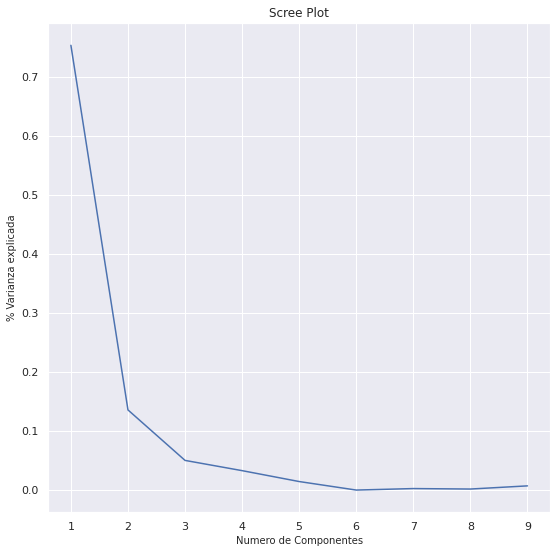

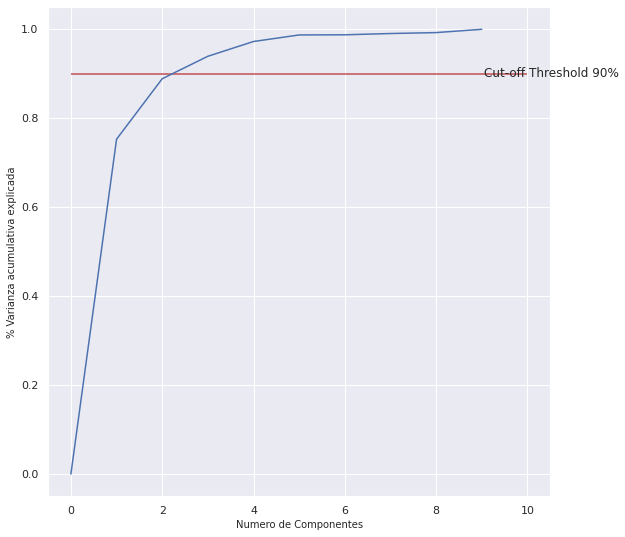

                                    CP1          CP2          CP3  \
Ciudad                                                              
Abilene,TX                  3628.605971 -7063.602730  3713.104870   
Akron,OH                    8777.048983 -7137.343567  3856.886673   
Albany,GA                   2970.631220 -7838.481133  2168.795998   
Albany-Schenectady-Troy,NY  8110.463050 -7377.694984  5847.643804   
Albuquerque,NM              8202.088748 -7935.766980  5690.748626   

                                    CP4          CP5         CP6         CP7  \
Ciudad                                                                         
Abilene,TX                 -6437.503199   757.079048  530.404564  364.000146   
Akron,OH                   -3022.714273  -306.400213  447.442314  204.839633   
Albany,GA                  -3903.229823   951.657678  361.463088  -95.739741   
Albany-Schenectady-Troy,NY -4368.996087  1198.819514  434.818761  707.625115   
Albuquerque,NM             -4288.391

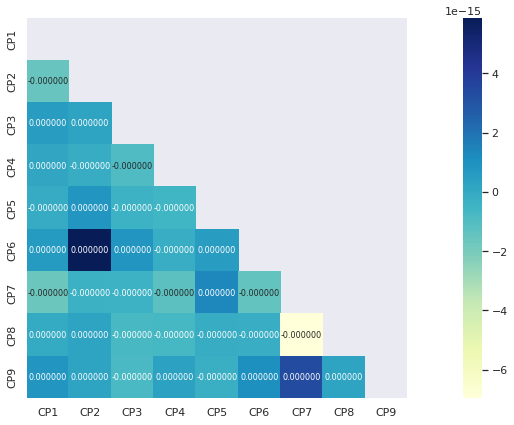

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

class componentes_principales:
    ''' Description: Calcular las transformaciones lienales dado los pesos representados en los vectores propios
        Author: Eduardo Toledo
        atributos: 
            data: referencia a los datos reales
            eigenvalues: numpy.array unidimensional de los valores propios
            eigenvectors: numpy.array multidimensional de los vectores propios
            componentes: datframe que almacenara los valores de los componentes principales.
            
    '''
 
    def __init__(self, data):
        '''
            Constructor para inicializar atributos y asignar el dataframe al atributo data
        '''
        self.data = data
        self.eigenvalues=None
        self.eigenvectors=None
        self.componentes=None
        
    def calcular_valores_vectores_propios(self):
        S= self.data.cov()
        eig_val, eig_vec = np.linalg.eig(S)
        self.eigenvalues = eig_val
        self.eigenvectors = eig_vec
        print(f' VALORES PROPIOS {[ "{:0.2f}".format(x) for x in self.eigenvalues ]}\n')   
        for i in range(self.eigenvectors.shape[0]):
            print(f'EIGEN VECTOR {i+1}: {self.eigenvectors[:,i]}\n')
    
    def obtener_componentes_principales(self):
        ''' Description: Calcular las transformaciones lienales dado los pesos representados en los vectores propios
            parametros: Ninguno
        '''
         #Validate si hay valores o vectorespropios
        if (self.eigenvalues is None):
            print('No hay valores propios ni vectores propios')
            return
        self.componentes= pd.DataFrame()
        for i in range(self.eigenvectors.shape[0]):
            f=self.data.dot(self.eigenvectors[:,i])
            self.componentes = self.componentes.assign(**{'CP'+ str(i+1): f})
        print(self.componentes.head(5))
    
    
    
    def varianza_explicada(self):
        np.set_printoptions(formatter={'float_kind':'{:f}'.format})
        #Validatar si hay valores o vectorespropios
        if (self.eigenvalues is None):
            print('No hay valores propios ni vectores propios')
            return
        fig = plt.figure(figsize=(9,9))
        total=sum(self.eigenvalues)
        porcentaje=(self.eigenvalues/total)
        ypoints= porcentaje
        xpoints= np.arange(1,self.eigenvalues.shape[0]+1)
        plt.title('Scree Plot')
        plt.xlabel('Numero de Componentes', fontsize=10)
        plt.ylabel('% Varianza explicada', fontsize=10)
        plt.plot(xpoints, ypoints)
        plt.show()
    
        fig = plt.figure(figsize=(9,9))
        varianza_accum_expl = np.cumsum(porcentaje, axis=0)
        ypoints=  np.insert(varianza_accum_expl, 0, 0)
        xpoints= np.arange(0,self.eigenvalues.shape[0]+1)
        plt.xlabel('Numero de Componentes', fontsize=10)
        plt.ylabel('% Varianza acumulativa explicada', fontsize=10)
        plt.hlines(y = 0.9, xmin = 0, xmax = self.eigenvalues.shape[0]+1, color='r')
        plt.text(12, 0.9, 'Cut-off Threshold 90%', ha ='right', va ='center')
        plt.plot(ypoints)
        plt.show()
     
   
    def matrix_correlacion_componentes(self):
        '''
            Obtiene la matrix de correlacion de los componentes principales - Simplemente curiosidad-
            Esta matrix deberia ser cero por la ortogonalidad de los componentes. 
        '''
        #Validatar si hay componentes
        if (self.componentes is None):
            print('No hay componentes principales calculados')
            return
        
        sns.set(font_scale=1)
        plt.figure(figsize = (20,7))
        mask = np.triu(np.ones_like(self.componentes.corr()))
        dataplot = sns.heatmap(self.componentes.corr(), cmap="YlGnBu", annot=True,square = True,mask= mask,fmt='3f',
                               annot_kws={'size': 8})
        plt.show()
        
   

    def plot_componentes_3D(self, anotaciones=False, rotar=False, angulo=0):
        #Validate si hay componentes
        if (self.componentes is None):
            print('No hay componentes principales calculados')
            return
        fig = plt.figure(figsize=(9,9))
        axes = Axes3D(fig)
        axes.set_title('Representacion PCA', size=14)
        axes.set_xlabel('CP1')
        axes.set_ylabel('CP2')
        axes.set_zlabel('CP3')

        axes.scatter(self.componentes['CP1'],self.componentes['CP2'],self.componentes['CP3'],c='r', cmap = 'prism', s=10)
        if (anotaciones==True):
            for index, row in self.componentes.iterrows():
                axes.text(row['CP1'], row['CP2'], row['CP3'], index,zorder=1,fontsize='xx-small')
        if rotar==True:
            axes.view_init(0, angulo)
            plt.draw()
        plt.show()
 
    def plot_componentes_2D(self,x='CP1', y='CP2'):
        #Validar si hay componentes
        if (self.componentes is None):
            print('No hay componentes principales calculados')
            return
      
        fig = plt.figure(figsize=(10,10))
        fgrid=sns.lmplot(x=x, y=y, data=self.componentes,  fit_reg=False,  legend=True,height=12, aspect=1.5 )
        ax = fgrid.axes[0,0]
        plt.title('Representacion PCA', size=14)
        plt.xlabel(x)
        plt.ylabel(y)
       
        for index, row in self.componentes.iterrows():
            ax.text(row[x], row[y], index,fontsize='small')
        plt.show()
     
    def biplot(self, indexes_componentes=[1,2]):
       #Validatar si hay vectores propios
        if (self.eigenvectors is None):
            print('No hay valores propios ni vectores propios')
            return
        componente1=indexes_componentes[0] -1
        componente2=indexes_componentes[1] -1
        
        # Pesos 
        plt.figure(figsize = (20,7))
        pesos_x = self.eigenvectors[:,componente1]
        pesos_y = self.eigenvectors[:,componente2]
        # Plot
        xs= self.componentes.iloc[:,componente1]
        ys= self.componentes.iloc[:,componente2]
        escala_x = 1.0/(xs.max() - xs.min())
        escala_y = 1.0/(ys.max() - ys.min())
        plt.scatter(xs * escala_x,ys * escala_y,s=5)
        for i, varnames in enumerate(list(self.data.columns)):
            plt.scatter(pesos_x[i], pesos_y[i], s=200)
            plt.arrow(
                0, 0, 
                pesos_x[i], 
                pesos_y[i], 
                color='r', 
                head_width=0.01
            )
            plt.text(pesos_x[i], pesos_y[i], varnames)
 
        plt.xlabel('CP' + str(componente1+1))
        plt.ylabel('CP' +  str(componente2+1))
 
        plt.title('Biplot')
        plt.show()
    
    def outliers_iqr(self,componente):
        df=self.componentes[componente]
        q1=df.quantile(0.25)
        q3=df.quantile(0.75)
        IQR=q3-q1
        outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
        return outliers
        

#  Instanciar la clase y llamar los metodos para calcular  los valores propios, vectores propios \
#  y obtener los graficos de varianza explicada 
_pca= componentes_principales(places_rated_almanac)
_pca.calcular_valores_vectores_propios()
_pca.varianza_explicada()
_pca.obtener_componentes_principales()
_pca.matrix_correlacion_componentes()




PCA remplaza  las features orginales with new variables llamados componentes principales, las cuales por definicion son ortogonales (covarianza cero) y las varianzas en esta nueva matriz son los valores propios ordenados decrecientemente.
## Análisis

- Se construye la matriz de covarianza desde los datos . Se descompone  la matriz de covarianza en su vectores propios y sus valores propios. Se selecciona k vectores propios que correspondan a los k valores propios mas grandes. Los componentes principales se construye  con la transformacion lineal de la matriz de pesos que estan conformados con los k vectores propios superiores.

- En el grafico de sedimentacion , hay un codo en el componente numero 3 y este numero de componentes explicaria  el 94.03%:

| Componente         | %Varianza explicada  | %Varianza Acumulada explicada  | 
|--------------|-----------|-----------|
| CP1 | 75.29%    | 75.29%|
| CP2    | 13.59%  |88.88%  |
| CP3    |5.05%  |94,03%  |
| Total    |**94,03%** |

*Procedimiento: Una vez obtenido los valores propios, estos representan la varianza explicada por cada  componente. La suma de los valores propios representa el 100% de la varianza y de aqui se calculan los porcentajes de varianza*.

- Por simple curiosidad, se muestra la matriz de correlacion de los componentes principales donde se confirma que son cero debido a la ortogonalidad de los componentes.



### 4.  Interpretación de los componentes principales. 

Logró reducir la dimensión en el ejercicio anterior? Si lo hizo, los pesos obtenidos pueden identificar dimensiones menores de los datos? Dé una interpretación a estas dimensiones, para ello puede utilizar gráficas (ej. `biplot`), tablas, etc.

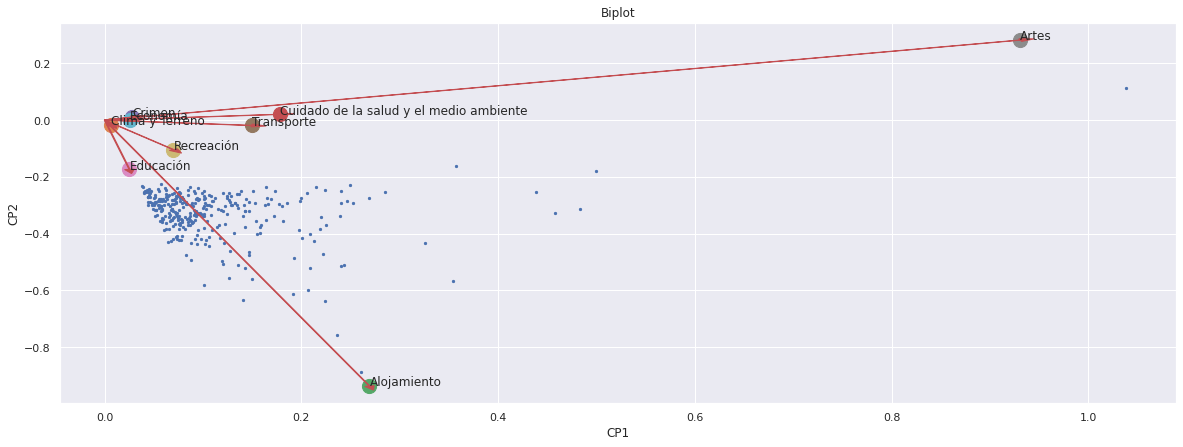

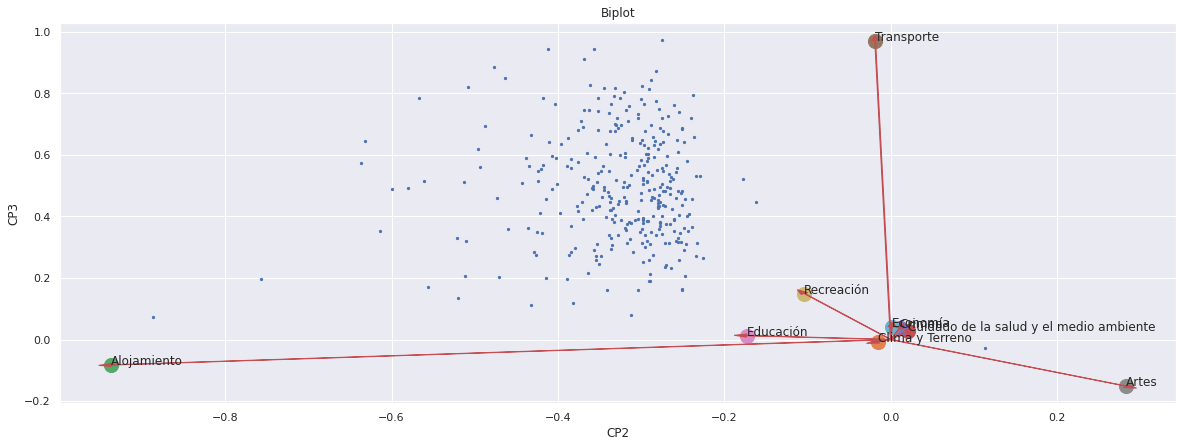

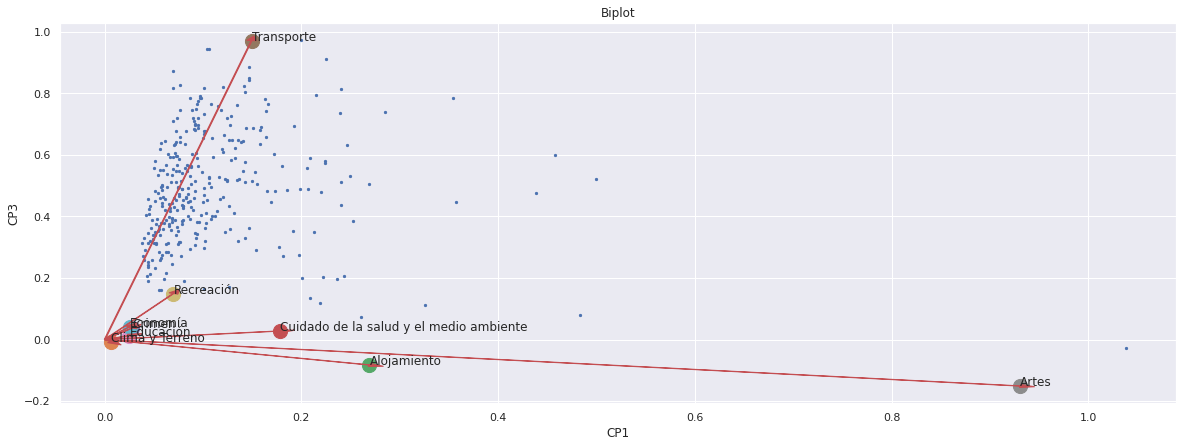

In [30]:

# Si deseamos 90% de varianza explicada entonces 3 componentes son necesarios
_pca.biplot()
_pca.biplot([2,3])
_pca.biplot([1,3])









## Análisis

### Interpretacion componentes y dimensiones
- Si deseamos 90% de varianza explicada entonces 3 componentes son necesarios.
- Dado los biplots, podemos inferir que Artes es la que mayor variable original que contribuye a PC1. La varianza de Alojamiento es que la mayor influye en PC2 y Transporte en PC3. Tambien es importante mencionar que dado que estas variables orginales no fueron  estandarizadas, la escala de la magnitud  de sus varianzas influyen en la configuracion final de los componentes.

De aqui, podemos decir que PC1 representaria ciudades con un interes para promover el arte, PC2 representaria ciudades con dificulatdes para obtener vivienda/alojamiento por su alta densidad poblacional y el deficit de oferta de vivienda y PC3 con ciudades con excelente infraestructura de transporte.


### 5.   Detección de ciudades inusuales.

A partir de los componentes seleccionados, idintifique si existen ciudades inusuales o átipicas. Explique claramente qué procedimiento utilizó para identificarlas e interprete los resultados incluyendo qué entiende por ciudad inusual o atípica.

<Figure size 720x720 with 0 Axes>

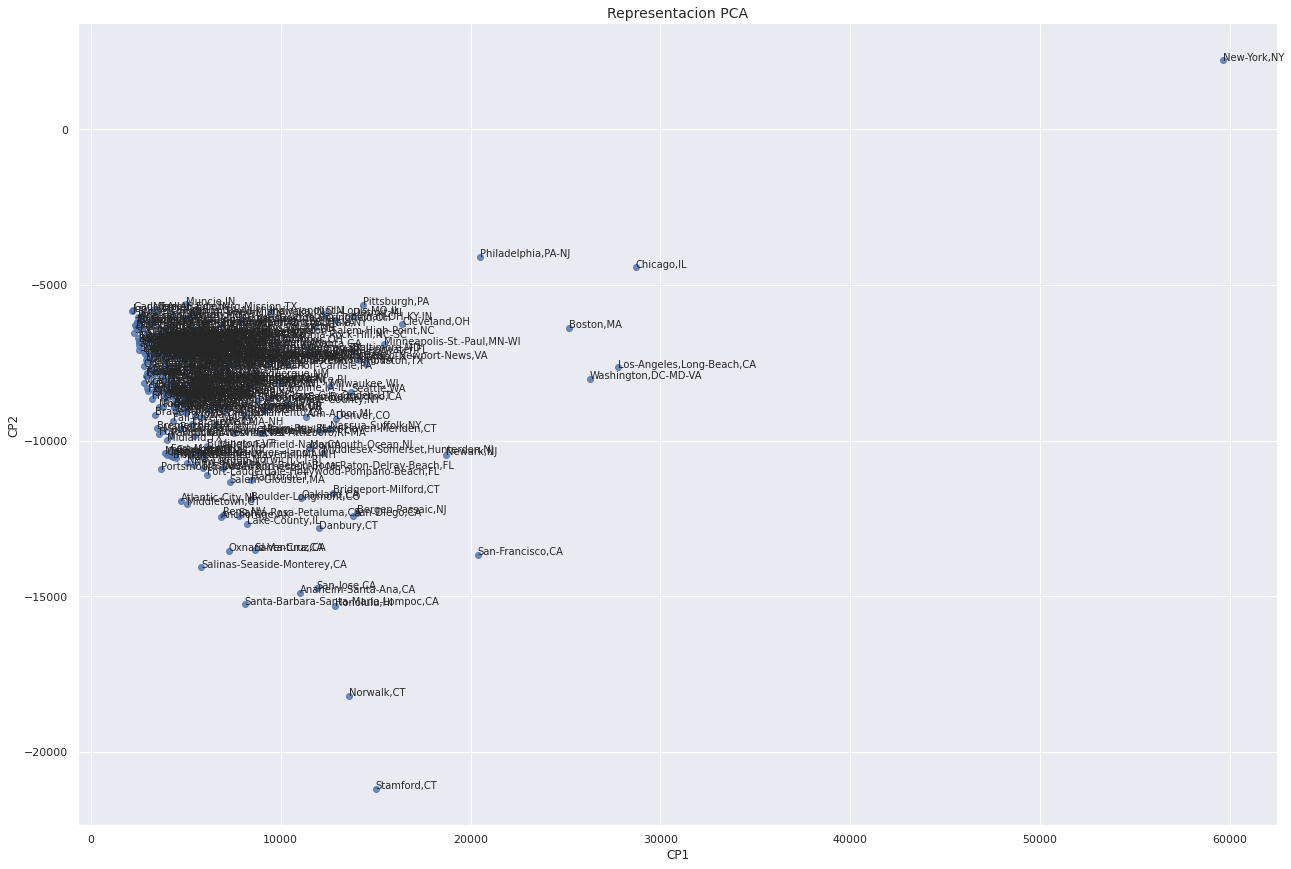

<Figure size 720x720 with 0 Axes>

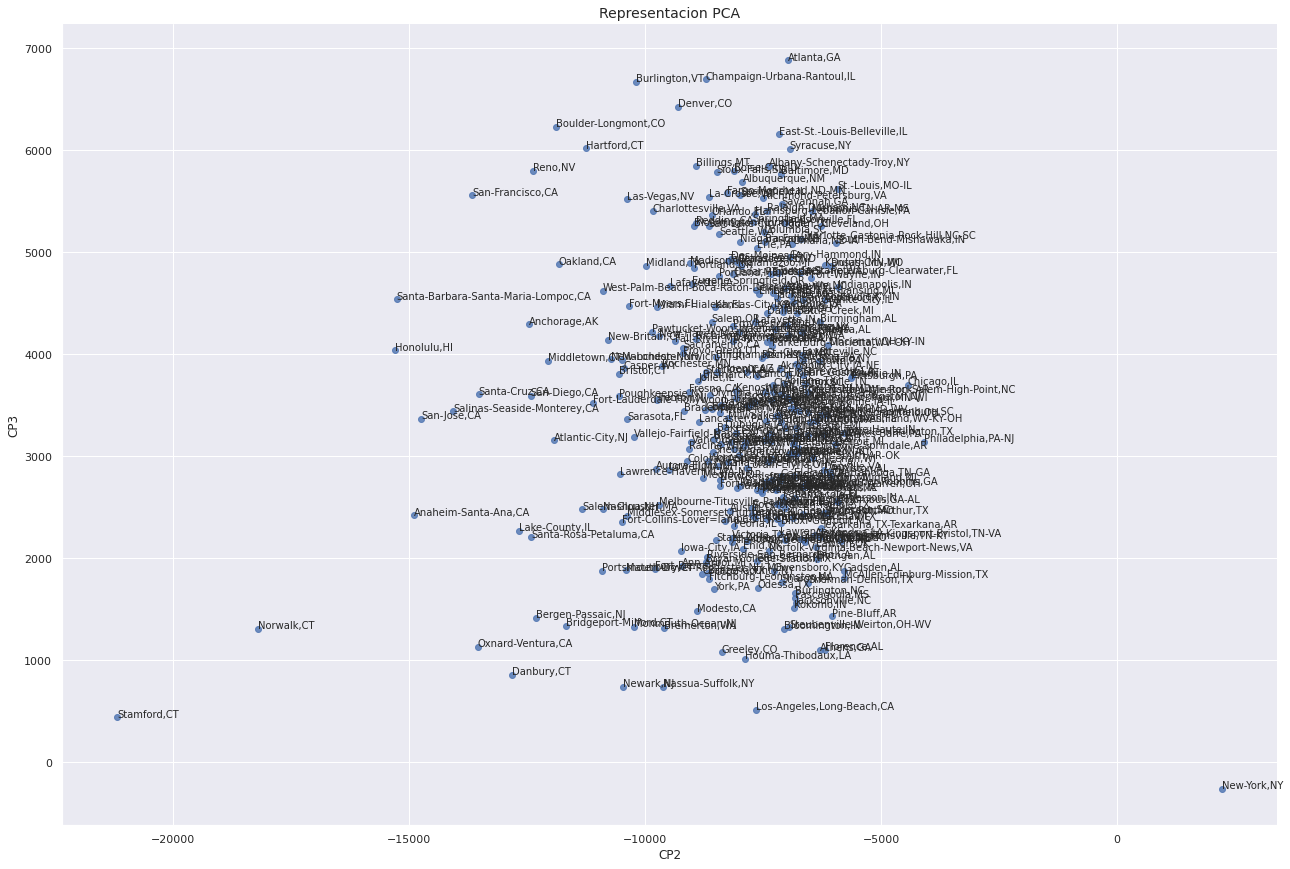

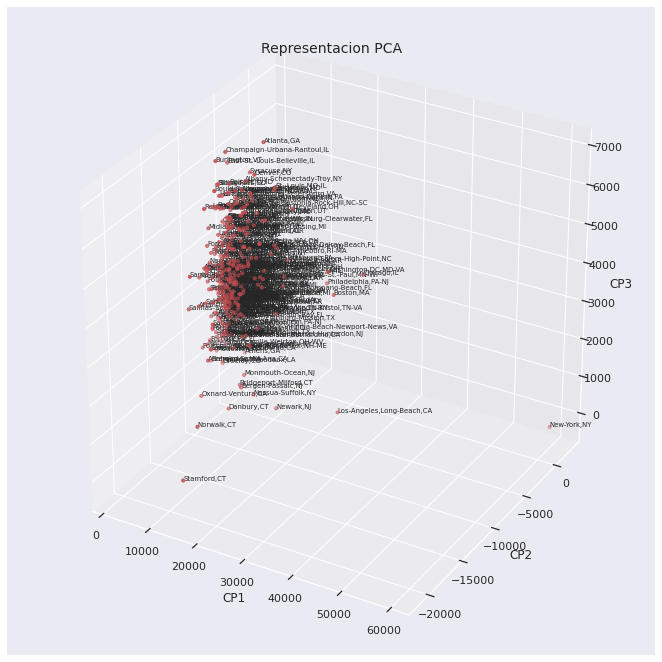

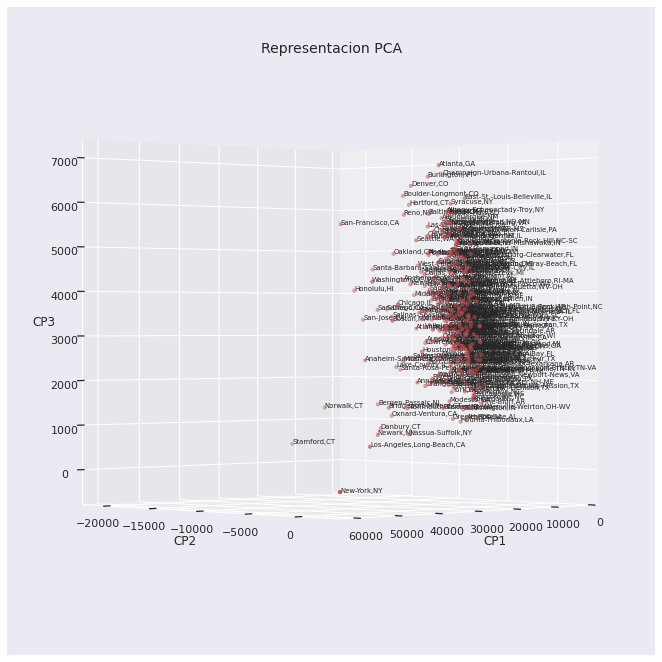

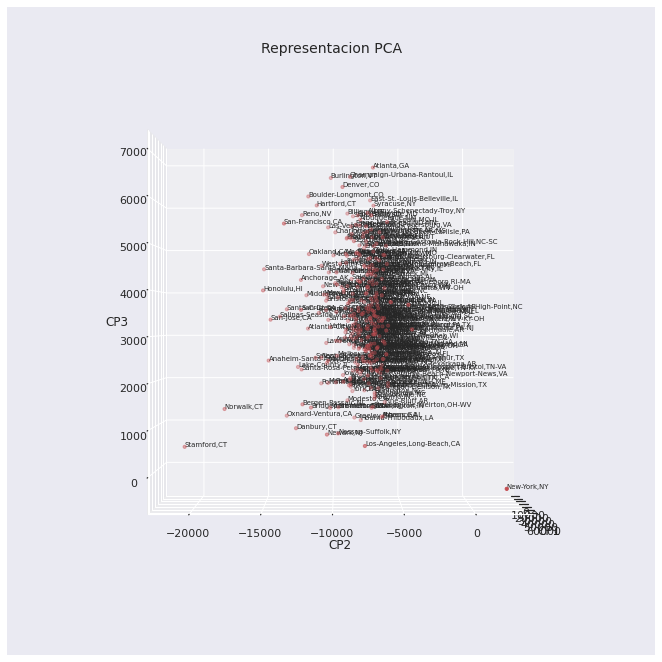

Outliers CP1:{'Detroit,MI', 'Houston,TX', 'Bergen-Passaic,NJ', 'Bridgeport-Milford,CT', 'Chicago,IL', 'Washington,DC-MD-VA', 'Baltimore,MD', 'Pittsburgh,PA', 'Honolulu,HI', 'Philadelphia,PA-NJ', 'Cleveland,OH', 'Milwaukee,WI', 'Los-Angeles,Long-Beach,CA', 'Minneapolis-St.-Paul,MN-WI', 'Newark,NJ', 'Stamford,CT', 'Seattle,WA', 'Cincinnati,OH-KY-IN', 'San-Diego,CA', 'San-Francisco,CA', 'Boston,MA', 'Norwalk,CT', 'Dallas,TX', 'Denver,CO', 'New-York,NY'}

Outliers CP2:{'Reno,NV', 'Bergen-Passaic,NJ', 'Atlantic-City,NJ', 'Santa-Cruz,CA', 'Bridgeport-Milford,CT', 'Boulder-Longmont,CO', 'Santa-Rosa-Petaluma,CA', 'San-Jose,CA', 'Honolulu,HI', 'Santa-Barbara-Santa-Maria-Lompoc,CA', 'Danbury,CT', 'Salinas-Seaside-Monterey,CA', 'Stamford,CT', 'Lake-County,IL', 'Middletown,CT', 'San-Diego,CA', 'Oxnard-Ventura,CA', 'Oakland,CA', 'San-Francisco,CA', 'Anchorage,AK', 'Norwalk,CT', 'New-York,NY', 'Anaheim-Santa-Ana,CA'}

Outliers CP3:{'New-York,NY'}

Interseccion de ciudades atipicas CP1, CP2, CP3:{'Ne

In [19]:
# Visualizacion de algunas ciudades inusuales
_pca.plot_componentes_2D(x='CP1', y='CP2')
_pca.plot_componentes_2D(x='CP2', y='CP3')
_pca.plot_componentes_3D(anotaciones=True)
_pca.plot_componentes_3D(anotaciones=True, rotar=True, angulo=45)
_pca.plot_componentes_3D(anotaciones=True, rotar=True)

# Calculo de Outliers
outliers_cp1= set(_pca.outliers_iqr('CP1').index)
outliers_cp2= set(_pca.outliers_iqr('CP2').index)
outliers_cp3= set(_pca.outliers_iqr('CP3').index)
print(f'Outliers CP1:{outliers_cp1}\n')
print(f'Outliers CP2:{outliers_cp2}\n')
print(f'Outliers CP3:{outliers_cp3}\n')

interseccion = outliers_cp1 & outliers_cp2 & outliers_cp3
print(f'Interseccion de ciudades atipicas CP1, CP2, CP3:{interseccion}\n')
interseccion = outliers_cp1 & outliers_cp2 
print(f'Interseccion de ciudades atipicas CP1, CP2:{interseccion}\n')
interseccion = outliers_cp1 & outliers_cp3
print(f'Interseccion de ciudades atipicas CP1, CP3:{interseccion}\n')
interseccion = outliers_cp2 & outliers_cp3
print(f'Interseccion de ciudades atipicas CP2, CP3:{interseccion}\n')




## Análisis

- A traves de los diagramas de representacion de los Scores de componentes principales en 2D y 3D, se observa algunas ciudades inusuales como (New York, NY) , (Stamford, CT), (Los Angeles,Long Beach, CA), (Atlanta, GA), (San Francisco, CA).

- Usando un procedimiento mas formal se obtiene para cada componente sus outliers - los datos que son más de 1.5 del rango interquantil. De aqui podemos tener varios escenarios , a saber:

Ciudades atipicas en CP1:{'Detroit,MI', 'Houston,TX', 'Bergen-Passaic,NJ', 'Bridgeport-Milford,CT', 'Chicago,IL', 'Washington,DC-MD-VA', 'Baltimore,MD', 'Pittsburgh,PA', 'Honolulu,HI', 'Philadelphia,PA-NJ', 'Cleveland,OH', 'Milwaukee,WI', 'Los-Angeles,Long-Beach,CA', 'Minneapolis-St.-Paul,MN-WI', 'Newark,NJ', 'Stamford,CT', 'Seattle,WA', 'Cincinnati,OH-KY-IN', 'San-Diego,CA', 'San-Francisco,CA', 'Boston,MA', 'Norwalk,CT', 'Dallas,TX', 'Denver,CO', 'New-York,NY'}

Ciudades atipicas en CP2:{'Reno,NV', 'Bergen-Passaic,NJ', 'Atlantic-City,NJ', 'Santa-Cruz,CA', 'Bridgeport-Milford,CT', 'Boulder-Longmont,CO', 'Santa-Rosa-Petaluma,CA', 'San-Jose,CA', 'Honolulu,HI', 'Santa-Barbara-Santa-Maria-Lompoc,CA', 'Danbury,CT', 'Salinas-Seaside-Monterey,CA', 'Stamford,CT', 'Lake-County,IL', 'Middletown,CT', 'San-Diego,CA', 'Oxnard-Ventura,CA', 'Oakland,CA', 'San-Francisco,CA', 'Anchorage,AK', 'Norwalk,CT', 'New-York,NY', 'Anaheim-Santa-Ana,CA'}

Ciudades atipicas que  promueven el arte y deficit de vivienda : {'San-Diego,CA', 'San-Francisco,CA', 'Norwalk,CT', 'Bergen-Passaic,NJ', 'Stamford,CT', 'Honolulu,HI', 'New-York,NY', 'Bridgeport-Milford,CT'}

Ciudades atipicas que  promueven el arte con buen infraestructura de transporte : {'New-York,NY'}

Ciudades atipicas que promueven el arte, deficit en vivienda y con buen infraestructura de transporte:  {'New-York,NY'}


### 6.   Robustez de resultados: Estandarizando los datos.

Repita los pasos anteriores con los datos estandarizados. Compare los resultados que obtuvo previo a, y luego de estandarizar los datos. Los resultados cambian significativamente? Justifique su respuesta. (Nota en este punto del ejercicio puede utilizar la función `PCA` de la libreria `sklearn`)

VARIANZA EXPLICADA: [0.378699 0.134886 0.126831 0.102324 0.083698 0.070062 0.054783 0.035338
 0.013378]
VARIANZA EXPLICADA ACUMULADA: 0.9999999999999998


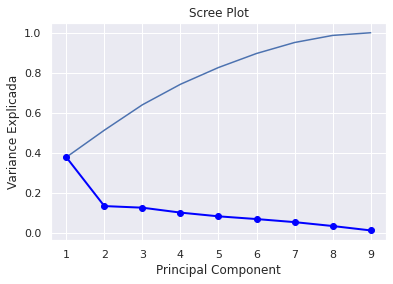

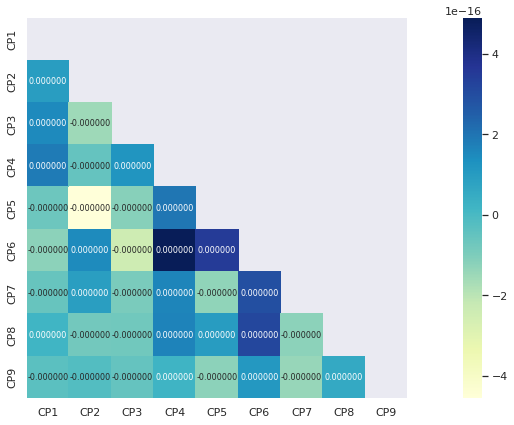

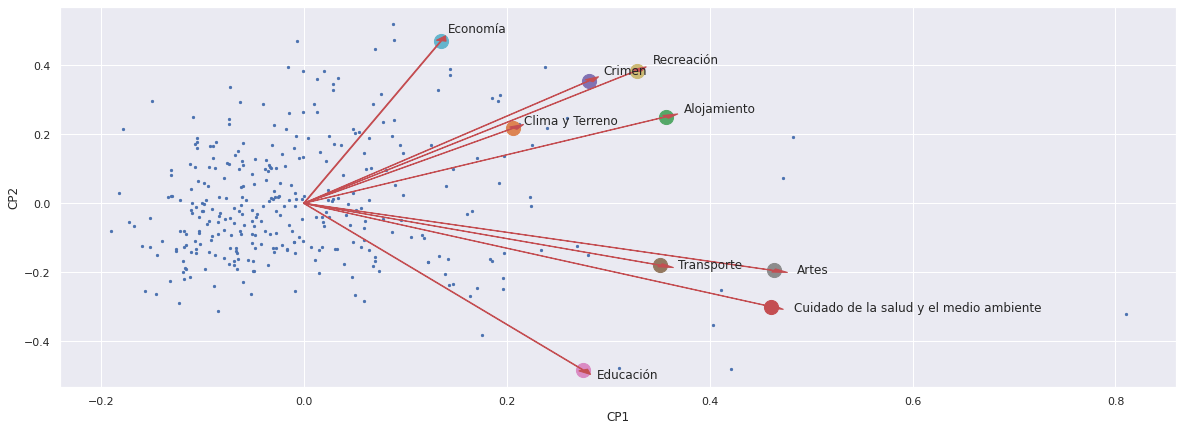

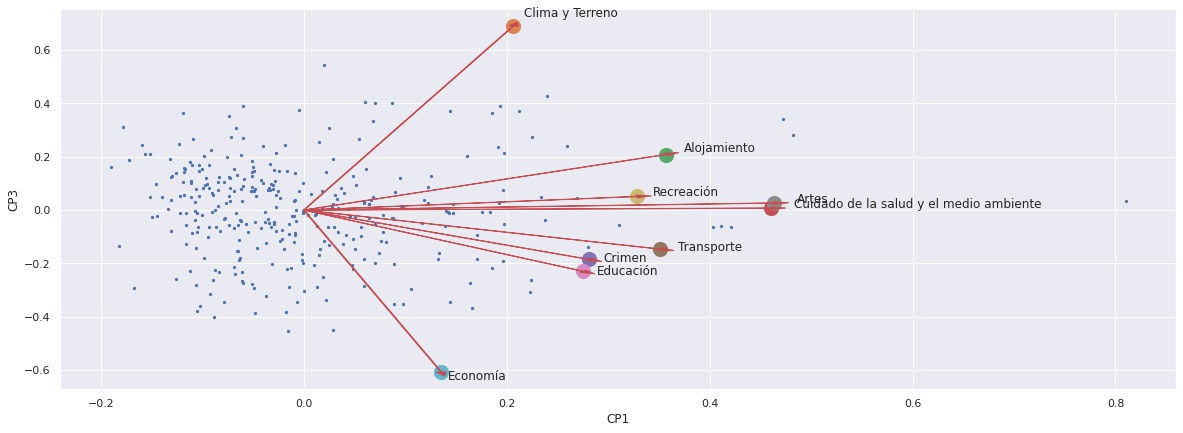

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
CP1,0.206414,0.356522,0.460215,0.281298,0.351151,0.275293,0.463054,0.327888,0.135412
CP2,0.217835,0.250624,-0.299465,0.355342,-0.179604,-0.483382,-0.194790,0.384475,0.471283
CP3,0.689956,0.208172,0.007325,-0.185105,-0.146376,-0.229703,0.026484,0.050853,-0.607314
CP4,0.137321,0.511829,0.014702,-0.539050,-0.302904,0.335411,-0.101080,-0.189801,0.421770
CP5,-0.369150,0.233488,-0.103241,-0.523940,0.404348,-0.208819,-0.105098,0.529541,-0.159620
CP6,-0.374605,0.141640,0.373848,-0.080923,-0.467592,-0.502170,0.461881,-0.089916,-0.032608
CP7,-0.084706,-0.230639,0.013868,0.018606,-0.583391,0.426182,-0.021525,0.627878,-0.149741
CP8,-0.362308,0.613855,-0.185676,0.430025,-0.093599,0.188668,-0.203990,-0.150596,-0.404809
CP9,0.001391,0.013600,-0.716355,-0.058608,0.003629,0.110840,0.685758,-0.025506,0.000438


In [8]:
import matplotlib.pyplot as plt 
import numpy as np


# Escalado de Features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
escalados = sc.fit_transform(places_rated_almanac)

# Aplicar PCA
from sklearn.decomposition import PCA
pca = PCA()
X_componentes_scores = pca.fit_transform(escalados)

#Plot Grafica de varianza explicada acumulada 
pc_valores = np.arange(pca.n_components_) + 1
plt.plot(pc_valores,np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numero de Componentes')
plt.ylabel('% Varianza acumulada explicada')

print(f'VARIANZA EXPLICADA: {pca.explained_variance_ratio_}')
print(f'VARIANZA EXPLICADA ACUMULADA: {np.sum(pca.explained_variance_ratio_)}')

#Plot de sedimentacion
plt.plot(pc_valores, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explicada')
plt.show()

#Demostracion de matrix de correlacion es cero de las pryecciones debido a la ortoganalidad (independecia) de los compoenntes
df = pd.DataFrame(data=X_componentes_scores, index=None, columns=['CP' + str(i) for i in range(1,10)])
sns.set(font_scale=1)
plt.figure(figsize = (20,7))
mask = np.triu(np.ones_like(df.corr()))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True,square = True,mask= mask,fmt='3f',  annot_kws={'size': 8})
plt.show()


def biplot(componentes,pesos,indexes_componentes,labels):
    componente1= indexes_componentes[0]-1
    componente2= indexes_componentes[1]-1
    
    xs = componentes[:,componente1]
    ys = componentes[:,componente2]
    escala_x = 1.0/(xs.max() - xs.min())
    escala_y = 1.0/(ys.max() - ys.min())
    plt.figure(figsize = (20,7))
    plt.scatter(xs * escala_x,ys * escala_y,s=5)
    for i, varnames in enumerate(labels):
            plt.scatter(pesos[componente1,i], pesos[componente2,i], s=200)
            plt.arrow(
                0, 0, 
                pesos[componente1,i], 
                pesos[componente2,i] , 
                color='r', 
                head_width=0.01
            )
            plt.text(pesos[componente1,i]* 1.05, pesos[componente2,i] * 1.05, varnames)
 
    plt.xlabel("CP{}".format(componente1+1))
    plt.ylabel("CP{}".format(componente2+1))
    plt.show()

biplot(X_componentes_scores, pca.components_, [1,2],list(places_rated_almanac.columns)) 
biplot(X_componentes_scores, pca.components_, [1,3],list(places_rated_almanac.columns)) 

indexes= ['CP' + str(x) for x in range(1, 10)]
df_comp= pd.DataFrame(pca.components_, index=indexes,columns= places_rated_almanac.columns)
df_comp

## Análisis

- En el grafico de sedimentacion hay un codo en componente numero 3 pero con este numero de componentes solamente explica el 62% de la varianza. Ahora con un threshold de 90% de varianza explicada se necesitarian 6 componentes principales.

- La configuracion de componentes es totalmente diferente debido a la estandarizacion de las variables oirginales. Entonces se puede concluir que si no se estandariza, la original feature  que presenta una mayor varianza, esta feature tendra mas influencia en los componentes principales. 

- Por otro lado, note que los eigenvectores usando algebra lineal se obtienen como vectores-columna. En cambio , la matriz de pca.componentes_ , los vectores propios son vectores-fila
 